# Pseudocolor plots

One of the most common types of plots that we make uses a color scale to illustrate the behavior of a dependent variable as a function of two independent variables. For instance $T(z,t)$ in the context of a heat transport problem.

In this example, I will plot the solution to the half-space cooling problem, which describes the cooling of the oceanic lithosphere for relatively young ages. **Note that for oceanic regions with seafloor ages greater than about 50 Myr, we prefer the plate cooling model over the half-space cooling model.**

The half-space cooling solution is given by
$$
\theta(\eta) = 1-\mathrm{erfc}(\eta)
$$
where
$$
\theta = \frac{T-T_1}{T_0-T_1}
$$
and
$$
\eta = \frac{z}{2\sqrt{\kappa t}}
$$
$z$ is depth, $\kappa$ is the thermal diffusivity, and $\\t$ is time.

The code below illustrates how to make a pseudocolor plot of this solution. Because the temperature depends on both depth and time, we need to evaluate the function T(z,t) at many different depths and temperatures. The easiest way to do this is to make two arrays containing the depth and temperature values. Then we use the `meshgrid` command to generate matrices that contain the depth and temperature values.
In our plot we will assume that:
$$
T_0 = 300 K\\
T_1 = 1600 K
$$

In [11]:
import numpy as np
import matplotlib.pyplot as plt

seconds_in_year = 3.15e7  # 3.15*10**7
#PRO TIP: Always use different numbers of elements in different dimensions. If you make a mistake, it will be easier to find by looking at dimensions!
z = np.linspace(0,100e3,100) # list of depth values, in m
t = np.linspace(0,50e6*seconds_in_year,200) # list of t values
# print these out on your own to see what happens:
tt,zz = np.meshgrid(t,z)
print(t.shape,z.shape,tt.shape,zz.shape)

(200,) (100,) (100, 200) (100, 200)


## Meshgrid
The meshgrid command takes two 1D arrays as input (z,t) and returns two matrices. The rows of the output matrix will correspond to the first input vector and the columns will corrspond to the second input vector.

In [12]:
from scipy.special import erfc # this syntax can be used to import a single function. You could do e.g. from numpy import pi
T1 = 1600.
T0 = 300.
kappa = 1e-6  # m/s^2
# calculate the temperature value for every value in zz,tt. Note that for this to work, zz and tt must be the same shape.
# When we work on all of the corresponding values in two vectors or matrices, this is called a 'broadcast' operation.
# sooner or later you will see an error related to broadcast operations. Python is telling you that the sizes of arrays are not compatible.
T = T1 - (T1-T0)*erfc(zz/(2*np.sqrt(kappa*tt))) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [13]:
print(T.shape)

(100, 200)


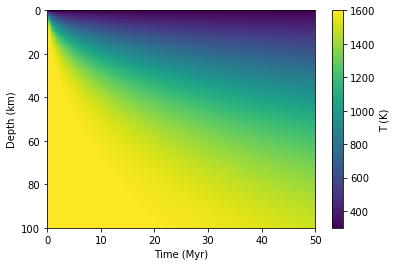

In [14]:
plt.figure()
plt.pcolormesh(tt/seconds_in_year/1e6,zz/1e3,T)
plt.xlabel('Time (Myr)') 
plt.ylabel('Depth (km)')
plt.gca().invert_yaxis() # gca is a function that returns a 'handle' to the current axes
plt.colorbar(label='T (K)')
plt.show()

# Alternate approach
If you don't like meshgrid, you can take the much slower approach of using nested for loops to construct the matrix containing temperature values. In general, Python code will run faster when using broadcast operations on the arrays than when using nested loops.

In [15]:
z = np.linspace(0,100e3,100) # list of depth values, in m
t = np.linspace(0,50e6*seconds_in_year,200) # list of t values
T = np.zeros((100,200)) # makes an array with two dimensions - a matrix
for i in range(len(z)):
    for j in range(len(t)):
        T[i,j] = T1 - (T1-T0)*erfc(z[i]/(2*np.sqrt(kappa*t[j]))) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


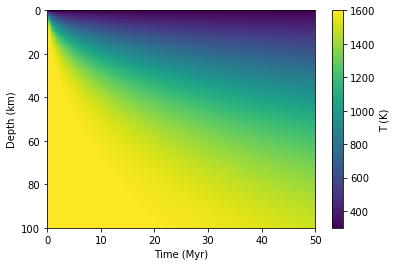

In [16]:
plt.figure()
plt.pcolormesh(tt/seconds_in_year/1e6,zz/1e3,T)
plt.xlabel('Time (Myr)') 
plt.ylabel('Depth (km)')
plt.gca().invert_yaxis() # gca is a function that returns a 'handle' to the current axes
plt.colorbar(label='T (K)')
plt.show()

# Adding contours

If you want to see a contour of a specific temperature value, you can use a similar function to generate contours.

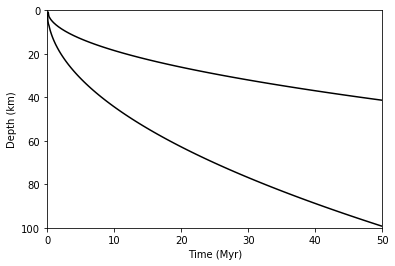

In [20]:
fig = plt.figure()
ax = plt.gca()
# h=ax.pcolormesh(tt/seconds_in_year/1e6,zz/1e3,T)
ax.contour(tt/seconds_in_year/1e6,zz/1e3,T,(1000.,1500.),colors='k') # add a contour at 1000K
ax.set_xlabel('Time (Myr)') 
ax.set_ylabel('Depth (km)')
ax.invert_yaxis() # gca is a function that returns a 'handle' to the current axes
# fig.colorbar(h) # h provided here is a handle to the 'mappable' in the pcolormesh command
plt.show()